In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
from scipy.stats import norm
%matplotlib inline

In [2]:
def Gaussian(data):
    mu, std = norm.fit(data)
    
    xmin = np.min(data)
    xmax = np.max(data)
    
    x = np.linspace(xmin,xmax, 100)
    p = norm.pdf(x, mu, std)
    return p

In [3]:
def Distr_D_N1(data):
    
    xmin = np.min(data)
    xmax = np.max(data)
    
    x = np.linspace(xmin+0.006,xmax, 100)
    
    p = [0 for i in range(len(x))]
    for i in range(len(x)):
        p[i] = (1/(3.2))*(x[i]**(-1+(1/2)))*((1-x[i])**(-1/2))
    
    return p

def Distr_DIII_N1(data):
    
    xmin = np.min(data)
    xmax = np.max(data)
    
    x = np.linspace(xmin+0.006,xmax, 100)
    
    p = [0 for i in range(len(x))]
    for i in range(len(x)):
        p[i] = (1/(2.1))*(x[i]**(-1+(2/2)))*((1-x[i])**(-1/2))
    
    return p

def Distr_C_N1(data):
    
    xmin = np.min(data)
    xmax = np.max(data)
    
    x = np.linspace(xmin+0.006,xmax, 100)
    
    p = [0 for i in range(len(x))]
    for i in range(len(x)):
        p[i] = 3*2*x[i]*(1-x[i]) 
    return p

In [4]:
df_Andreev_G_D = pd.read_csv(r'Channel/Andreev_G_D_Channel.txt', sep = '\t', header = None)
df_Andreev_P_D = pd.read_csv(r'Channel/Andreev_P_D_Channel.txt', sep = '\t', header = None)

df_Andreev_G_DIII = (1/2)*pd.read_csv(r'Channel/Andreev_G_DIII_Channel.txt', sep = '\t', header = None)
df_Andreev_P_DIII = (1/2)*pd.read_csv(r'Channel/Andreev_P_DIII_Channel.txt', sep = '\t', header = None)

df_Andreev_G_C = (1/2)*pd.read_csv(r'Channel/Andreev_G_C_Channel.txt', sep = '\t', header = None)
df_Andreev_P_C = (1/2)*pd.read_csv(r'Channel/Andreev_P_C_Channel.txt', sep = '\t', header = None)

df_Andreev_G_CI = (1/2)*pd.read_csv(r'Channel/Andreev_G_CI_Channel.txt', sep = '\t', header = None)
df_Andreev_P_CI = (1/2)*pd.read_csv(r'Channel/Andreev_P_CI_Channel.txt', sep = '\t', header = None)

In [5]:
df_Andreev_G_D.rename(columns = lambda s:s+1, index = lambda s: s+1)

,1,2,3,4,5,6,7,8,9,10
1,0.089432,0.532123,1.74324,2.35540,2.55199,3.23642,3.03478,3.94990,4.97729,4.63958
2,0.947344,1.389870,1.90507,2.07889,2.05920,3.46537,3.65619,3.88478,5.08332,5.08145
3,0.052257,0.975618,1.71085,2.19225,3.01550,2.97859,3.50679,3.67924,4.44247,4.53816
4,0.071887,0.996315,1.94644,2.25201,2.68574,2.68753,3.08923,4.22610,5.09814,4.88251
5,0.972974,0.622502,1.04188,2.34195,2.66961,3.47168,3.68055,3.80443,4.38387,5.17422
...,...,...,...,...,...,...,...,...,...,...
99996,0.343114,0.867562,1.72199,1.77473,2.02679,2.71062,3.69523,3.49786,4.37791,4.95561
99997,0.046526,1.135380,1.00498,2.26599,3.10370,2.88779,3.31506,4.18179,4.42406,4.90372
99998,0.556427,0.570188,1.39931,2.01801,2.26563,2.84628,3.54074,4.27500,4.62776,4.39938
99999,0.380052,1.164010,1.17997,1.63725,2.67276,2.93243,2.94413,4.41958,4.45793,4.48769


In [6]:
df_Andreev_G_DIII.rename(columns = lambda s:s+1, index = lambda s: s+1)

,1,2,3,4,5,6,7,8,9,10
1,0.222137,1.591475,1.274470,1.953665,2.571525,2.909035,3.693700,4.178940,4.787760,5.039150
2,0.083895,1.465710,1.762840,2.148095,2.517700,3.081300,3.584880,4.054390,5.174850,5.404700
3,0.984265,1.017450,1.988175,1.855755,2.711370,3.799175,3.411525,3.963060,4.752160,5.193300
4,0.893955,0.809810,1.819745,2.053785,2.374515,3.122465,3.159480,4.142310,4.846500,5.237350
5,0.576150,1.233635,1.560710,2.234320,2.792485,3.200650,3.479495,4.092860,4.145655,5.071500
...,...,...,...,...,...,...,...,...,...,...
99996,0.971805,0.675110,1.356500,2.108490,2.872750,2.981590,3.764570,3.361135,4.442295,4.926215
99997,0.822200,1.200705,1.631615,2.027420,2.669795,2.816750,3.537705,4.172615,4.734305,5.196250
99998,0.982600,1.171895,1.644615,2.286145,2.269130,3.374360,4.085495,4.007440,5.208400,4.994020
99999,0.868520,1.236465,1.628340,1.912935,2.457085,3.399925,3.594920,4.251015,4.450320,5.399350


In [7]:
df_Andreev_G_C.rename(columns = lambda s:s+1, index = lambda s: s+1)

,1,2,3,4,5,6,7,8,9,10
1,0.607995,1.219400,1.343320,2.392965,2.491200,3.188320,3.323310,4.136340,4.456595,5.018050
2,0.475115,0.903560,1.622085,2.129015,2.832325,3.151780,3.818100,3.818275,4.306400,4.819815
3,0.383325,0.569130,1.467050,2.002295,2.541255,2.925435,3.575795,3.936065,4.875295,5.135300
4,0.367154,0.776680,1.514775,2.082435,2.246175,3.238650,3.398700,4.369370,4.270805,4.790860
5,0.089511,1.170210,1.321575,2.138470,2.249830,2.938005,3.381990,4.237610,4.760585,5.196300
...,...,...,...,...,...,...,...,...,...,...
99996,0.436981,1.077475,1.540065,1.878715,2.491595,3.296865,3.311070,3.887925,4.373385,4.698605
99997,0.166931,1.144820,1.637540,2.472685,2.594775,3.256065,3.516150,4.028620,4.416525,4.928375
99998,0.658760,1.236550,1.590375,2.267395,2.741705,2.994465,3.630465,4.076100,4.520810,5.017850
99999,0.281302,1.241780,1.566050,2.063880,2.846970,2.903780,3.489135,3.905370,4.331035,5.091900


In [8]:
df_Andreev_G_CI.rename(columns = lambda s:s+1, index = lambda s: s+1)

,1,2,3,4,5,6,7,8,9,10
1,0.345896,1.056655,0.777025,1.987945,2.357120,2.884140,3.483675,3.745635,3.819570,5.433550
2,0.122526,0.867075,1.864705,1.723970,2.679610,2.627285,3.289815,3.673955,4.175625,4.735350
3,0.426546,0.700205,1.245440,1.971405,2.475350,3.154320,3.186650,3.732210,4.117300,4.875795
4,0.294176,0.648445,1.224100,1.749150,2.781670,2.750115,3.131235,3.652030,4.174280,4.787350
5,0.814895,0.819940,1.663695,2.022990,2.301560,2.835660,3.479720,3.466175,4.523715,4.956610
...,...,...,...,...,...,...,...,...,...,...
99996,0.629980,0.782500,1.485570,1.575000,2.528900,2.712645,3.234115,3.835555,4.182250,4.433620
99997,0.159424,0.909960,1.233355,1.315850,2.095105,2.989375,3.056865,3.943955,4.354935,4.877280
99998,0.141658,1.226630,1.368565,2.078730,2.242125,2.588150,3.372815,3.718165,4.384975,4.478665
99999,0.103080,0.582710,1.268175,1.657105,2.556740,2.541645,3.273365,3.205960,3.910080,4.425150


In [9]:
G_D = df_Andreev_G_D.values
P_D = df_Andreev_P_D.values

G_DIII = df_Andreev_G_DIII.values
P_DIII = df_Andreev_P_DIII.values

G_C = df_Andreev_G_C.values
P_C = df_Andreev_P_C.values

G_CI = df_Andreev_G_CI.values
P_CI = df_Andreev_P_CI.values

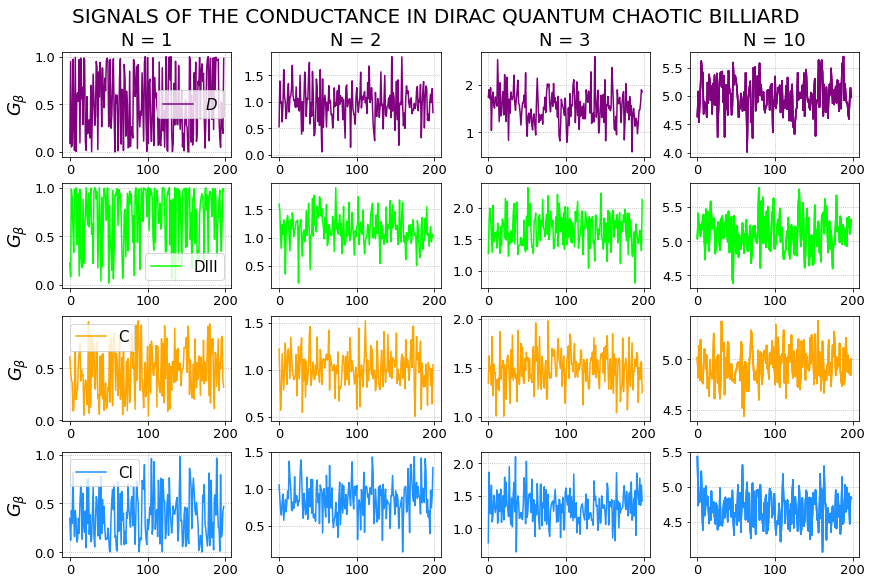

In [10]:
fig, axs = plt.subplots(4,4, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'SIGNALS OF THE CONDUCTANCE IN DIRAC QUANTUM CHAOTIC BILLIARD', fontsize = 20)

for j in range(0,4):
    for i in range(0,4):
        
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 13)
        
        if (j == 3):
            
            axs[0,3].set_title('N = 10', fontsize = 18) 
            
            axs[0,3].plot(G_D[0:199,9], color='purple', label = r'D', alpha=1);
            axs[1,3].plot(G_DIII[0:199,9], color='lime', label = r'DIII', alpha=1);
            axs[2,3].plot(G_C[0:199,9], color='orange', label = r'C', alpha=1);
            axs[3,3].plot(G_CI[0:199,9], color='dodgerblue', label = r'CI', alpha=1);
            
        else:
            axs[0,j].set_title('N = '+ str(j+1), fontsize = 18)
            if (i == 0):
                axs[i,j].plot(G_D[0:199,j], color='purple', label = r'$D$', alpha=1);
            else:
                if (i == 1):
                    axs[i,j].plot(G_DIII[0:199,j], color='lime', label = r'DIII', alpha=1);
                else:
                    if (i == 2):
                        axs[i,j].plot(G_C[0:199,j], color='orange', label = r'C', alpha=1);
                    else:
                        if (i == 3):
                            axs[i,j].plot(G_CI[0:199,j], color='dodgerblue', label = r'CI', alpha=1);
        
        if (j == 0):
            axs[i,0].set_ylabel(r'$G_{\beta}$', fontsize = 18)
            axs[i,0].legend(fontsize = 15)
            
        axs[i,j].grid(linestyle=':')

/home/rafael/anaconda3_new/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/rafael/anaconda3_new/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


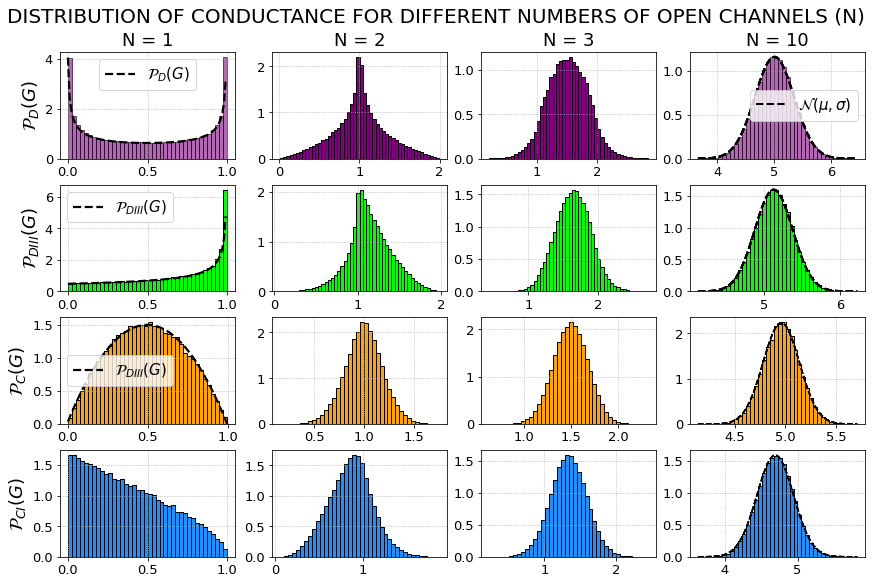

In [11]:
steps = 50

fig, axs = plt.subplots(4,4, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'DISTRIBUTION OF CONDUCTANCE FOR DIFFERENT NUMBERS OF OPEN CHANNELS (N)', fontsize = 20)

for j in range(0,4):
    for i in range(0,4):
        
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 13)
        
        if (j == 0):
            
            axs[0,0].set_ylabel(r'$\mathcal{P}_{D}(G)$', fontsize = 18)
            axs[1,0].set_ylabel(r'$\mathcal{P}_{DIII}(G)$', fontsize = 18)
            axs[2,0].set_ylabel(r'$\mathcal{P}_{C}(G)$', fontsize = 18)
            axs[3,0].set_ylabel(r'$\mathcal{P}_{CI}(G)$', fontsize = 18)
            
            axs[0,0].set_title('N = 1', fontsize = 18) 
            
            axs[0,0].hist(G_D[:,0], bins = 40, color='purple', alpha=0.2, density = True, histtype='bar', ec='black');
            axs[1,0].hist(G_DIII[:,0], bins = 40, color='lime', alpha=1, density = True, histtype='bar', ec='black');
            axs[2,0].hist(G_C[:,0], bins = 40, color='orange', alpha=1, density = True, histtype='bar', ec='black');
            axs[3,0].hist(G_CI[:,0], bins = 40, color='dodgerblue', alpha=1, density = True, histtype='bar', ec='black');

            if (i == 0):
                x = np.linspace(np.min(G_D[:,0]), np.max(G_D[:,0]), 100)
                axs[0,0].plot(x, Distr_D_N1(G_D[:,0]), color = 'black', label = r'$\mathcal{P}_{D}(G)$', alpha = 1, linewidth = 2.2, linestyle = 'dashed')
                axs[0,0].legend(fontsize = 15, loc = "best")
            
            elif (i == 1):
                x = np.linspace(np.min(G_DIII[:,0]), np.max(G_DIII[:,0]), 100)
                axs[1,0].plot(x, Distr_DIII_N1(G_DIII[:,0]), color = 'black', label = r'$\mathcal{P}_{DIII}(G)$', alpha = 1, linewidth = 2.2, linestyle = 'dashed')
                axs[1,0].legend(fontsize = 15, loc = "best")
            elif (i == 2):
                x = np.linspace(np.min(G_C[:,0]), np.max(G_C[:,0]), 100)
                axs[2,0].plot(x, Distr_C_N1(G_DIII[:,0]), color = 'black', label = r'$\mathcal{P}_{DIII}(G)$', alpha = 1, linewidth = 2.2, linestyle = 'dashed')
                axs[2,0].legend(fontsize = 15, loc = "best")
            
        elif (j == 3):
            
            axs[0,3].set_title('N = 10', fontsize = 18) 
            
            axs[0,3].hist(G_D[:,9], bins = 40, color='purple', alpha=0.2, density = True, histtype='bar', ec='black');
            axs[1,3].hist(G_DIII[:,9], bins = 40, color='lime', alpha=1, density = True, histtype='bar', ec='black');
            axs[2,3].hist(G_C[:,9], bins = 40, color='orange', alpha=1, density = True, histtype='bar', ec='black');
            axs[3,3].hist(G_CI[:,9], bins = 40, color='dodgerblue', alpha=1, density = True, histtype='bar', ec='black');

            x = np.linspace(np.min(G_D[:,9]), np.max(G_D[:,9]), 100)
            axs[0,3].plot(x,Gaussian(G_D[:,9]), color = 'black', label = r'$\mathcal{N}(\mu,\sigma)$', alpha = 1, linewidth = 2, linestyle = 'dashed')
            
            x = np.linspace(np.min(G_DIII[:,9]), np.max(G_DIII[:,9]), 100)
            axs[1,3].plot(x,Gaussian(G_DIII[:,9]), color = 'black', alpha = 1, linewidth = 2, linestyle = 'dashed')

            x = np.linspace(np.min(G_C[:,9]), np.max(G_C[:,9]), 100)
            axs[2,3].plot(x,Gaussian(G_C[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')
            
            x = np.linspace(np.min(G_CI[:,9]), np.max(G_CI[:,9]), 100)
            axs[3,3].plot(x,Gaussian(G_CI[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')

            
        else:
            axs[0,j].set_title('N = '+ str(j+1), fontsize = 18)
            if (i == 0):
                axs[i,j].hist(G_D[:,j], bins = 50, color='purple', label = r'D', alpha=1, density = True, histtype='bar', ec='black');
            else:
                if (i == 1):
                    axs[i,j].hist(G_DIII[:,j], bins = 50, color='lime', label = r'DIII', alpha=1, density = True, histtype='bar', ec='black');
                else:
                    if (i == 2):
                        axs[i,j].hist(G_C[:,j], bins = 40, color='orange', label = r'C', alpha=1, density = True, histtype='bar', ec='black');
                    else:
                        if (i == 3):
                            axs[i,j].hist(G_CI[:,j], bins = 40, color='dodgerblue', label = r'CI', alpha=1, density = True, histtype='bar', ec='black');
            
        
        if (j == 3 and i == 0):
            axs[0,3].legend(fontsize = 15, loc = 'best')
        
        axs[i,j].grid(linestyle=':')

/home/rafael/anaconda3_new/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/rafael/anaconda3_new/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


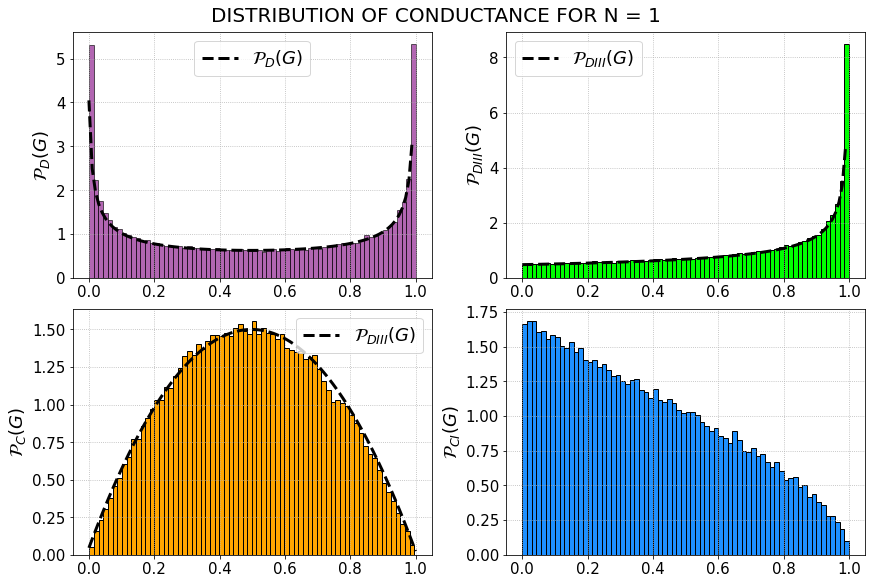

In [12]:
steps = 50

fig, axs = plt.subplots(2,2, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'DISTRIBUTION OF CONDUCTANCE FOR N = 1', fontsize = 20)

         
axs[0,0].hist(G_D[:,0], bins = 70, color='purple', alpha=0.6, density = True, histtype='bar', ec='black');
x = np.linspace(np.min(G_D[:,0]), np.max(G_D[:,0]), 100)
axs[0,0].plot(x, Distr_D_N1(G_D[:,0]), color = 'black', label = r'$\mathcal{P}_{D}(G)$', alpha = 1, linewidth = 3, linestyle = 'dashed')
axs[0,0].set_ylabel(r'$\mathcal{P}_{D}(G)$', fontsize = 18)
axs[0,0].legend(fontsize = 18, loc = 'best')

axs[0,1].hist(G_DIII[:,0], bins = 70, color='lime', alpha=1, density = True, histtype='bar', ec='black');
x = np.linspace(np.min(G_DIII[:,0]), np.max(G_DIII[:,0]), 100)
axs[0,1].plot(x, Distr_DIII_N1(G_D[:,0]), color = 'black', label = r'$\mathcal{P}_{DIII}(G)$', alpha = 1, linewidth = 3, linestyle = 'dashed')
axs[0,1].set_ylabel(r'$\mathcal{P}_{DIII}(G)$', fontsize = 18)
axs[0,1].legend(fontsize = 18, loc = 'best')

axs[1,0].hist(G_C[:,0], bins = 70, color='orange', alpha=1, density = True, histtype='bar', ec='black');
axs[1,0].set_ylabel(r'$\mathcal{P}_{C}(G)$', fontsize = 18)
axs[1,0].plot(x, Distr_C_N1(G_C[:,0]), color = 'black', label = r'$\mathcal{P}_{DIII}(G)$', alpha = 1, linewidth = 3, linestyle = 'dashed')
axs[1,0].legend(fontsize = 18, loc = 'best')

axs[1,1].hist(G_CI[:,0], bins = 70, color='dodgerblue', alpha=1, density = True, histtype='bar', ec='black');
axs[1,1].set_ylabel(r'$\mathcal{P}_{CI}(G)$', fontsize = 18)

for i in range(2):
    for j in range(2):
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 15)
        axs[i,j].grid(linestyle=':')

In [13]:
meanG_D = np.mean(G_D, axis = 0)
meanG_DIII = np.mean(G_DIII, axis = 0)
meanG_C = np.mean(G_C, axis = 0)
meanG_CI = np.mean(G_CI, axis = 0)

varG_D = np.var(G_D, axis = 0)
varG_DIII = np.var(G_DIII, axis = 0)
varG_C = np.var(G_C, axis = 0)
varG_CI = np.var(G_CI, axis = 0)

meanP_D = np.mean(P_D, axis = 0)
meanP_DIII = np.mean(P_DIII, axis = 0)
meanP_C = np.mean(P_C, axis = 0)
meanP_CI = np.mean(P_CI, axis = 0)

varP_D = np.var(P_D, axis = 0)
varP_DIII = np.var(P_DIII, axis = 0)
varP_C = np.var(P_C, axis = 0)
varP_CI = np.var(P_CI, axis = 0)

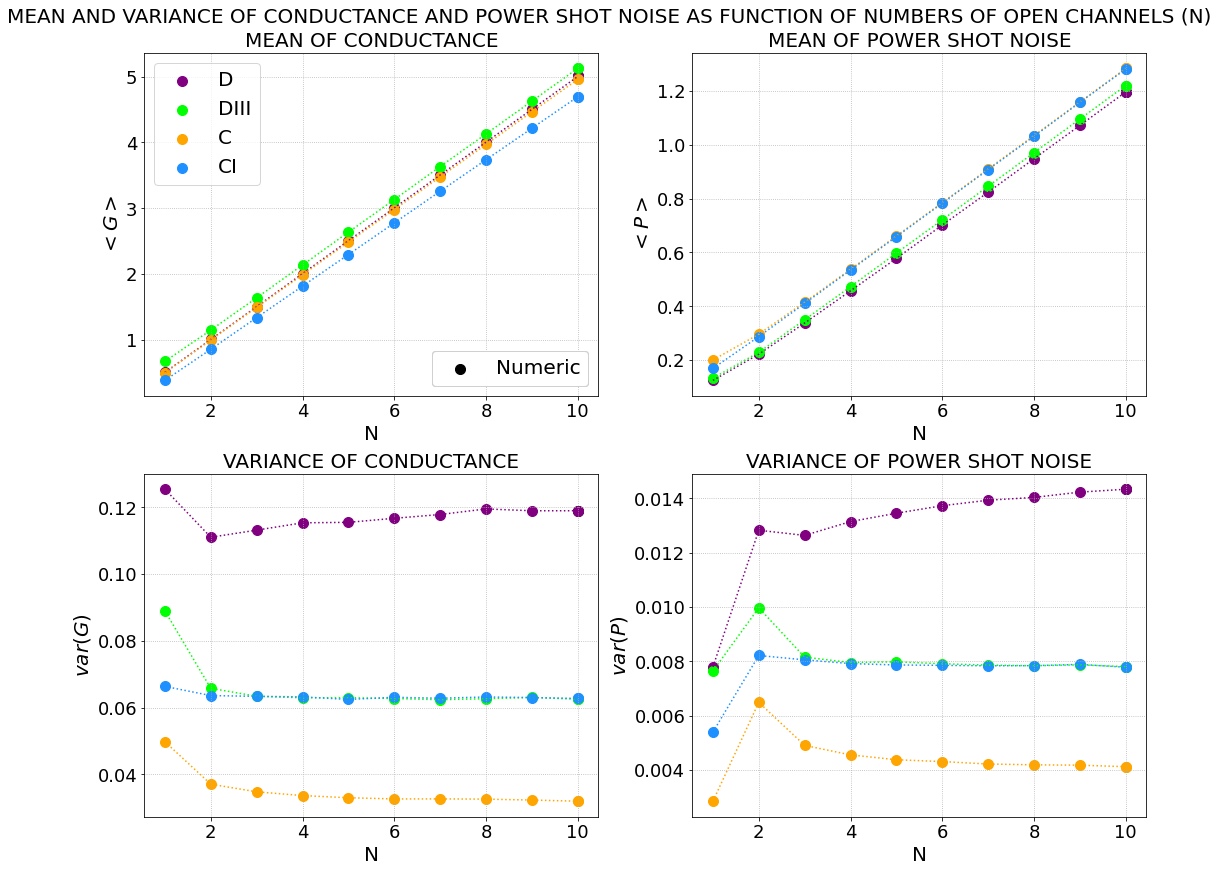

In [14]:
#meanG_O_aux = np.empty(10, dtype = float)
#meanG_U_aux = np.empty(10, dtype = float)
#meanG_S_aux = np.empty(10, dtype = float)

#varG_O_aux = np.empty(10, dtype = float)
#varG_U_aux = np.empty(10, dtype = float)
#varG_S_aux = np.empty(10, dtype = float)

#for N1 in range(1,11):
    
#    N2 = N1
#    NT = N1 + N2

#    meanG_O_aux[N1-1] = (1/2)*(4*1*(N1*N2*NT))/((1*NT+1)*(2*NT-1))
#    meanG_U_aux[N1-1] = (1/2)*(4*2*(N1*N2*NT))/((2*NT+1)*(2*NT-1))
#    meanG_S_aux[N1-1] = (1/2)*(4*4*(N1*N2*NT))/((4*NT+1)*(2*NT-1))
#    
#    varG_O_aux[N1-1] = (1/4)*(16*N1*N2*NT*(3+2*np.power(NT,3)+4*N1*N2*np.power(NT,2)-4*NT-4*N1*N2-5*np.power(N1,2)-5*np.power(N2,2)))/((2*NT-3)*((np.power((2*NT-1),2)))*(NT+3)*(np.power((NT+1),2))*(2*NT+1))
#    varG_U_aux[N1-1] = (1/4)*(8*N1*N2*(3+16*N1*N2*np.power(NT,2)-6*np.power(NT,2)-6*np.power(N1,2)-6*np.power(N2,2)))/((2*NT-3)*(2*NT+3)*(np.power((2*NT+1),2))*(np.power((2*NT-1),2)))
#    varG_S_aux[N1-1] = (1/4)*(32*N1*N2*NT*(3-16*N1*N2+8*NT-20*np.power(N1,2)-20*np.power(N2,2)-16*np.power(NT,3)+64*N1*N2*np.power(NT,2)))/((4*NT+3)*(np.power((4*NT+1),2))*(2*NT-3)*(np.power((2*NT-1),2))*(4*NT-1))

fig, axs = plt.subplots(2,2, figsize = (15,12), constrained_layout = True)

fig.suptitle(r'MEAN AND VARIANCE OF CONDUCTANCE AND POWER SHOT NOISE AS FUNCTION OF NUMBERS OF OPEN CHANNELS (N)', fontsize = 20)

for i in range(0,2):
    for j in range(0,2):
        
        if (i == 0) and (j == 0):
            axs[0,0].set_title('MEAN OF CONDUCTANCE', fontsize = 20)
            axs[0,0].set_ylabel(r'$<G>$', fontsize = 20)
            
            variable_D = meanG_D; variable_DIII = meanG_DIII; variable_C = meanG_C; variable_CI = meanG_CI
            
        else:
            if (i == 1) and (j == 0):
  
                axs[1,0].set_title('VARIANCE OF CONDUCTANCE', fontsize = 20)
                axs[1,0].set_ylabel(r'$var(G)$', fontsize = 20)
            
                variable_D = varG_D; variable_DIII = varG_DIII; variable_C = varG_C; variable_CI = varG_CI
            
            else:
                if (i == 0) and (j == 1):
                    
                    axs[0,1].set_title('MEAN OF POWER SHOT NOISE', fontsize = 20)
                    axs[0,1].set_ylabel(r'$<P>$', fontsize = 20)
                    
                    variable_D = meanP_D; variable_DIII = meanP_DIII; variable_C = meanP_C; variable_CI = meanP_CI
                    
                else:
                    if (i == 1) and (j == 1):
                        axs[1,1].set_title('VARIANCE OF POWER SHOT NOISE', fontsize = 20)
                        axs[1,1].set_ylabel(r'$var(P)$', fontsize = 20)
                        #axs[1,1].set_ylim([0,0.018])

                        variable_D = varP_D; variable_DIII = varP_DIII; variable_C = varP_C; variable_CI = varP_CI
        
        
        for k in range(0,len(meanG_D)):
            axs[i,j].scatter((k+1), variable_D[k], s = 100, color = 'purple', alpha = 1)
            axs[i,j].scatter((k+1), variable_DIII[k], s = 100, color = 'lime', alpha = 1)
            axs[i,j].scatter((k+1), variable_C[k], s = 100, color = 'orange', alpha = 1)
            axs[i,j].scatter((k+1), variable_CI[k], s = 100, color = 'dodgerblue', alpha = 1)
            
            if k == (len(meanG_D)-1):
                Numeric_scatter = axs[i,j].scatter((k+1), variable_D[k], label = 'Numeric', s = 100, color = 'black', alpha = 1)
                Class_D = axs[i,j].scatter((k+1), variable_D[k], label = r'D', s = 100, color = 'purple', alpha = 1)
                Class_DIII = axs[i,j].scatter((k+1), variable_DIII[k], label = r'DIII', s = 100, color = 'lime', alpha = 1)
                Class_C = axs[i,j].scatter((k+1), variable_C[k], label = r'C', s = 100, color = 'orange', alpha = 1)
                Class_CI = axs[i,j].scatter((k+1), variable_CI[k], label = r'CI', s = 100, color = 'dodgerblue', alpha = 1)

        axs[i,j].plot([i for i in range(1,11)], variable_D, color = 'purple', linestyle = ':')
        axs[i,j].plot([i for i in range(1,11)], variable_DIII, color = 'lime', linestyle = ':')
        axs[i,j].plot([i for i in range(1,11)], variable_C, color = 'orange', linestyle = ':')
        axs[i,j].plot([i for i in range(1,11)], variable_CI, color = 'dodgerblue', linestyle = ':')
        
#        if (i == 0 and j == 0):
#            Exact_plot, = axs[0,0].plot([i for i in range(1,11)], meanG_O_aux, label = 'Exact', color = 'black', linestyle = '-')
#            axs[0,0].plot([i for i in range(1,11)], meanG_O_aux, color = 'dodgerblue', linestyle = '-')
#            axs[0,0].plot([i for i in range(1,11)], meanG_U_aux, color = 'red', linestyle = '-')
#            axs[0,0].plot([i for i in range(1,11)], meanG_S_aux, color = 'lime', linestyle = '-')
        
#        if (i == 1 and j == 0):
#            axs[1,0].plot([i for i in range(1,11)], varG_O_aux , color = 'dodgerblue', linestyle = '-')
#            axs[1,0].plot([i for i in range(1,11)], varG_U_aux, color = 'red', linestyle = '-')
#            axs[1,0].plot([i for i in range(1,11)], varG_S_aux, color = 'lime', linestyle = '-')

        axs[i,j].grid(linestyle=':')
        first_legend = axs[0,0].legend([Numeric_scatter], ["Numeric"], loc = "lower right", fontsize = 20)
        axs[0,0].add_artist(first_legend)
        axs[0,0].legend([Class_D, Class_DIII, Class_C, Class_CI], [r'D', r'DIII', r'C', r'CI'], loc = "upper left", fontsize = 20)

        axs[i,j].set_xlabel('N', fontsize = 20)
        axs[i,j].tick_params(axis = 'both', which = 'major', labelsize = 18)

In [15]:
meanG_U = np.empty(10, dtype = float)

for i in range(10):
    N1 = i+1
    N2 = N1
    meanG_U[i] = N1*N2/(N1+N2)

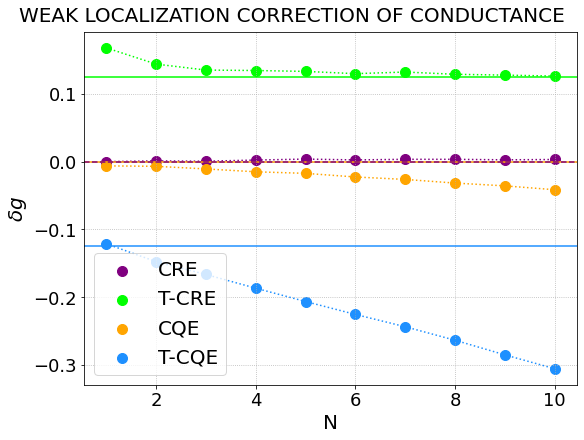

In [16]:
delta_g_D = ((1/1)*(1-2-(-1)))*(1/4)
delta_g_DIII = ((1/2)*(2-2-(-1)))*(1/4)
delta_g_C = ((1/4)*(4-2-(2)))*(1/4)
delta_g_CI = ((1/2)*(2-2-(1)))*(1/4)

fig, axs = plt.subplots(1,1, figsize = (8,6), constrained_layout = True)

fig.suptitle(r'WEAK LOCALIZATION CORRECTION OF CONDUCTANCE', fontsize = 20)

axs.plot([i for i in range(1,11)], (meanG_D - meanG_U), color = 'purple', linestyle = ':', alpha = 1)
axs.plot([i for i in range(1,11)], (meanG_DIII - meanG_U), color = 'lime', linestyle = ':', alpha = 1)
axs.plot([i for i in range(1,11)], (meanG_C - meanG_U), color = 'orange', linestyle = ':', alpha = 1)
axs.plot([i for i in range(1,11)], (meanG_CI - meanG_U), color = 'dodgerblue', linestyle = ':', alpha = 1)

axs.scatter([i for i in range(1,11)], (meanG_D - meanG_U), label = 'CRE', s = 100, color = 'purple', alpha = 1)
axs.scatter([i for i in range(1,11)], (meanG_DIII - meanG_U), label = 'T-CRE' , s = 100, color = 'lime', alpha = 1)
axs.scatter([i for i in range(1,11)], (meanG_C - meanG_U), label = 'CQE', s = 100, color = 'orange', alpha = 1)
axs.scatter([i for i in range(1,11)], (meanG_CI - meanG_U), label = 'T-CQE', s = 100, color = 'dodgerblue', alpha = 1)

axs.set_xlabel('N', fontsize = 20)
axs.tick_params(axis = 'both', which = 'major', labelsize = 18)
axs.set_ylabel(r'$\delta g$', fontsize = 20)
axs.grid(linestyle=':')
axs.legend(loc = "best", fontsize = 20)

axs.axhline(y=delta_g_CI, color='dodgerblue', linestyle='-')
axs.axhline(y=delta_g_C, color='orange', linestyle='-')
axs.axhline(y=delta_g_DIII, color='lime', linestyle='-')
axs.axhline(y=delta_g_D, color='purple', linestyle='dashed')

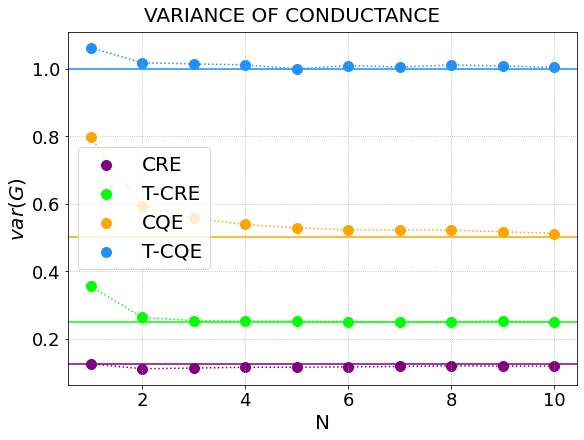

In [17]:
varG_D_aux = np.var(G_D, axis = 0)
varG_DIII_aux = np.var(2*G_DIII, axis = 0)
varG_C_aux = np.var(4*G_C, axis = 0)
varG_CI_aux = np.var(4*G_CI, axis = 0)

fig, axs = plt.subplots(1,1, figsize = (8,6), constrained_layout = True)

fig.suptitle(r'VARIANCE OF CONDUCTANCE', fontsize = 20)

axs.plot([i for i in range(1,11)], varG_D_aux, color = 'purple', linestyle = ':', alpha = 1)
axs.plot([i for i in range(1,11)], varG_DIII_aux, color = 'lime', linestyle = ':', alpha = 1)
axs.plot([i for i in range(1,11)], varG_C_aux, color = 'orange', linestyle = ':', alpha = 1)
axs.plot([i for i in range(1,11)], varG_CI_aux, color = 'dodgerblue', linestyle = ':', alpha = 1)

axs.scatter([i for i in range(1,11)], varG_D_aux, label = 'CRE', s = 100, color = 'purple', alpha = 1)
axs.scatter([i for i in range(1,11)], varG_DIII_aux, label = 'T-CRE' , s = 100, color = 'lime', alpha = 1)
axs.scatter([i for i in range(1,11)], varG_C_aux, label = 'CQE', s = 100, color = 'orange', alpha = 1)
axs.scatter([i for i in range(1,11)], varG_CI_aux, label = 'T-CQE', s = 100, color = 'dodgerblue', alpha = 1)

axs.set_xlabel('N', fontsize = 20)
axs.tick_params(axis = 'both', which = 'major', labelsize = 18)
axs.set_ylabel(r'$var(G)$', fontsize = 20)
axs.grid(linestyle=':')
axs.legend(loc = "best", fontsize = 20)

axs.axhline(y=(1/1), color='dodgerblue', linestyle='-')
axs.axhline(y=(1/2), color='orange', linestyle='-')
axs.axhline(y=(1/4), color='lime', linestyle='-')
axs.axhline(y=(1/8), color='purple', linestyle='-')